# 0. Introduction
Welcome to the Risk-Parity Portfolio Analysis project! In this project, you'll explore the concept of risk-parity, a popular portfolio management strategy that aims to allocate investments in a way that equalizes the risk contribution of each asset. This approach is widely used by hedge funds and institutional investors to create more balanced portfolios that are less sensitive to market volatility.

Throughout this project, you'll learn how to download financial data for various assets, calculate returns, and compute risk-parity weights using Python. By the end, you'll evaluate the performance of your risk-parity portfolio through key financial metrics such as annualized return, volatility, and Sharpe ratio. This hands-on experience will deepen your understanding of portfolio management and give you practical skills in financial data analysis. Whether you're new to finance or looking to enhance your quantitative finance skills, this project provides a solid foundation in risk-parity strategies and their application in real-world scenarios.

## Getting Started: Tips and Instructions

1. **Familiarize Yourself with the Notebook Structure:**
   - The notebook is organized into clearly defined sections, each focusing on a specific aspect of the risk-parity portfolio analysis. Take a moment to glance through the sections to understand the overall workflow.

2. **Review the Data:**
   - Since the data is already available, start by exploring the initial few cells to understand the data structure and what each column represents. This will give you context for the calculations and analysis you'll be performing.

3. **Run Cells Sequentially:**
   - Work through the notebook by executing each code cell in order. This will help you build your analysis step by step and ensure that each part of the project is functioning as expected.

4. **Experiment with Parameters:**
   - Feel free to tweak parameters such as the rolling window size for calculating risk-parity weights or adjust the assets included in the portfolio. Experimenting will help deepen your understanding of how these factors influence portfolio performance.

5. **Leverage the Plots:**
   - Use the generated plots to visually assess the impact of your calculations. The visualizations are crucial for understanding the risk-parity approach and how different assets contribute to the portfolio.

6. **Reflect:**
   - As you work through the notebook, consider why each step is necessary and how it contributes to the overall goal of building a risk-parity portfolio. If something isn’t clear, take a moment to reflect or explore additional resources.

Enjoy the process of exploring risk-parity strategies, and don't hesitate to dive deeper into the data or code to enhance your learning experience!

# 1. Import Libraries

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

## Define Useful Functions

In [51]:
def evaluate_portfolio_performance(returns):
    """
    Evaluate the performance of a portfolio given its returns.

    Parameters:
    - returns (pd.Series): Series of portfolio returns.

    Returns:
    - dict: A dictionary containing various performance metrics.
    """
    # Annualized metrics
    annual_mean_return = returns.mean() * 12
    annual_volatility = returns.std() * np.sqrt(12)
    
    # Higher moments
    skewness = returns.skew()
    kurtosis = returns.kurt()

    # Drawdown and Max Drawdown
    cumulative_returns = (1 + returns).cumprod()
    running_max = cumulative_returns.cummax()
    drawdown = (running_max - cumulative_returns) / running_max
    max_drawdown = drawdown.max()

    # Sharpe Ratio
    sharpe_ratio = annual_mean_return / annual_volatility

    # Sortino Ratio
    downside_std = returns[returns < 0].std() * np.sqrt(12)
    sortino_ratio = annual_mean_return / downside_std

    # Calmar Ratio
    calmar_ratio = -annual_mean_return / max_drawdown

    # Total Return
    total_return = (cumulative_returns.iloc[-1] - 1) * 100

    # Results dictionary
    metrics = {
        "Total Return (%)": total_return,
        "Annual Mean Return (%)": annual_mean_return * 100,
        "Annual Volatility (%)": annual_volatility * 100,
        "Downside Volatility (%)": downside_std * 100,
        "Skewness": skewness,
        "Kurtosis": kurtosis,
        "Max Drawdown (%)": max_drawdown * 100,
        "Sharpe Ratio": sharpe_ratio,
        "Sortino Ratio": sortino_ratio,
        "Calmar Ratio": calmar_ratio
    }
    
    results = {
        "metrics": metrics,
        "cumulative_returns": cumulative_returns,
        "drawdown": drawdown
    }
    
    

    return results


def print_results(results):
    """
    Prints the performance metrics of a portfolio, excluding specified metrics.

    Parameters:
    - results (dict): A dictionary containing performance metrics, where keys are metric names 
                      (e.g., 'Sharpe Ratio', 'Total Return') and values are the corresponding metric values.
    Returns:
    - None: Prints the metrics to the console.
    """
    metrics = results['metrics']
    for key, value in metrics.items():
        print(f"{key}: {value:.2f}")
        
def plot_portfolio_performance(results):
    """
    Plots the cumulative returns and drawdown of a portfolio.

    Parameters:
    - risk_parity_results (dict): A dictionary containing portfolio performance data. 
                                  It should include keys 'cumulative_returns' and 'drawdown', 
                                  both of which are pandas Series indexed by date.

    Returns:
    - None: Displays a plot of the cumulative returns and drawdown.
    """
    # Extract data
    cumulative_returns = results['cumulative_returns']
    drawdown = results['drawdown']

    # Create plot
    fig, ax = plt.subplots(figsize=(14, 7))
    (cumulative_returns - 1).plot(ax=ax, label='Cumulative Returns', color='blue')
    drawdown.plot(ax=ax, label='Drawdown', color='red')
    
    # Configure plot appearance
    ax.set_title('Cumulative Returns and Drawdown')
    ax.set_ylabel('Cumulative Returns')
    ax.set_xlabel('Date')
    ax.legend()
    
    # Display plot
    plt.show()

# 2. Download Financial Data
We will download front-month futures data for S&P500, 10-year Treasuries, gold, and US dollar using the `yfinance` library.

In [31]:
# Download front-month futures data
symbols = ['ES=F', 'ZN=F', 'GC=F', 'DX=F']
data = yf.download(symbols)

[*********************100%%**********************]  4 of 4 completed


### 3. Resample Data

In this section, we aim to reduce the noise in the daily financial data by resampling it to a monthly frequency. Resampling is a common technique in time series analysis, allowing us to aggregate data points over a specified time period. This helps in smoothing out short-term fluctuations and making the data more manageable for analysis.


In [32]:
# Resample data to monthly frequency
data = data.resample('M').mean() # YOUR CODE HERE
# Convert index to datetime
data.index = pd.to_datetime(data.index) # YOUR CODE HERE

In [33]:
print(type(data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


### 4. Clean and Prepare Data

In this step, we will focus on extracting the relevant data, handling missing values, and ensuring the data is ready for analysis. Specifically, we'll subset the adjusted close prices from our dataset, fill any missing values, and drop rows with unknown prices.

#### Steps to Clean and Prepare Data

1. **Subset Adjusted Close Prices**     
2. **Fill Missing Values (NaNs)**
3. **Drop Rows with Remaining NaNs**
4. **Ensure Correct Date Formatting**

By following these steps, we will have a clean dataset of adjusted close prices that is free of missing values and properly formatted for time series analysis.


In [34]:
# Subset adjusted close prices and fill NaNs
prices = data['Adj Close'].ffill() # YOUR CODE HERE
# Convert index to datetime
# prices.index = None # YOUR CODE HERE

In [35]:
print(prices)

Ticker            DX=F         ES=F         GC=F        ZN=F
Date                                                        
2000-06-30  107.180000          NaN          NaN         NaN
2000-07-31  108.050000          NaN          NaN         NaN
2000-08-31  111.046957          NaN   276.099991         NaN
2000-09-30  114.136191  1463.425000   273.389996  100.064739
2000-10-31  115.898181  1403.818182   269.809090  100.848732
...                ...          ...          ...         ...
2024-07-31  104.318682  5586.659091  2393.336370  110.814631
2024-08-31  102.058046  5501.738636  2467.249989  113.372869
2024-09-30  100.852599  5642.674512  2572.869983  114.574219
2024-10-31  103.122218  5836.532609  2688.904350  112.056386
2024-11-30  105.297076  5930.365385  2649.284630  109.846154

[294 rows x 4 columns]


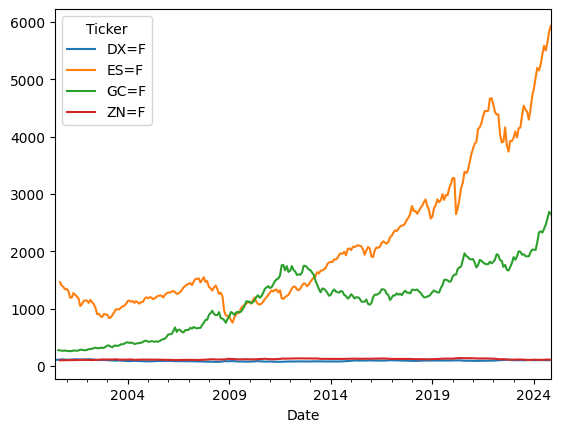

In [36]:
prices.plot()
plt.show()

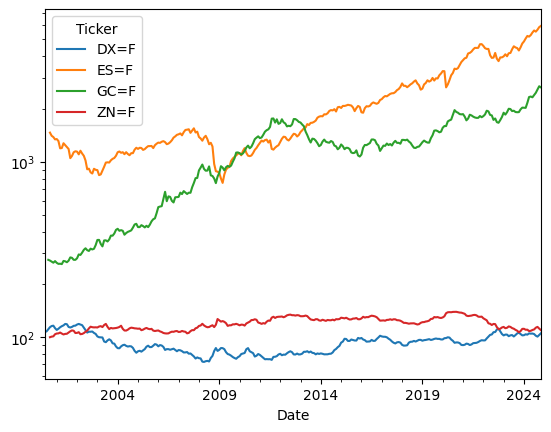

In [37]:
prices.plot()
plt.yscale("log")
plt.show()

### 5. Calculate Returns

In financial analysis, one of the key metrics is the return on an investment, which shows how much the price of an asset has increased or decreased over a certain period. We will calculate the **arithmetic returns** of the adjusted close prices to measure this change over time.

#### Steps to Calculate Arithmetic Returns

1. **Understanding Arithmetic Returns:**
   - Arithmetic returns measure the percentage change in the price of an asset from one period to the next. 
   - The formula for calculating the arithmetic return for a given period is:

     $
     R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
     $
     
     where:
     - $ R_t $ is the return at time $ t $,
     - $ P_t $ is the price at time $ t $,
     - $ P_{t-1} $ is the price at the previous time period.

   - This formula can be simplified to:
     $
     R_t = \frac{P_t}{P_{t-1}} - 1
     $
   - However, in practice, it is common to use the percentage change function provided by Pandas, which handles this calculation efficiently.

2. **Calculate Percentage Change**
3. **Handle Missing Values:**

By following these steps, we will have a series of arithmetic returns that represent the day-to-day percentage changes in the asset's price, which can be used for further analysis such as calculating cumulative returns, volatility, or risk metrics.


In [38]:
# Compute arithmetic returns
returns = prices.pct_change().dropna()

In [39]:
print(returns)

Ticker          DX=F      ES=F      GC=F      ZN=F
Date                                              
2000-10-31  0.015438 -0.040731 -0.013098  0.007835
2000-11-30  0.004298 -0.016000 -0.014581  0.003640
2000-12-31 -0.032010 -0.030510  0.021213  0.027986
2001-01-31 -0.022762  0.004579 -0.022627  0.009503
2001-02-28  0.015590 -0.025764 -0.013438  0.001736
...              ...       ...       ...       ...
2024-07-31 -0.006608  0.027269  0.028915  0.007361
2024-08-31 -0.021670 -0.015201  0.030883  0.023086
2024-09-30 -0.011811  0.025617  0.042809  0.010596
2024-10-31  0.022504  0.034356  0.045099 -0.021976
2024-11-30  0.021090  0.016077 -0.014735 -0.019724

[290 rows x 4 columns]


### 6. Compute Risk-Parity Weights

Risk-parity is an investment strategy that seeks to allocate portfolio weights in a way that each asset contributes equally to the overall portfolio risk. This method is especially useful in diversifying risk across different assets with varying levels of volatility.

#### Steps to Compute Risk-Parity Weights

1. **Understanding Risk-Parity:**
   - The idea behind risk-parity is to allocate more weight to less volatile assets and less weight to more volatile assets, thereby equalizing the risk contribution of each asset in the portfolio.
   - The weight of each asset in the portfolio is inversely proportional to its volatility.

2. **Calculate Rolling Volatility:**
   - Volatility is a statistical measure of the dispersion of returns for a given security or market index.
     
3. **Compute Inverse Volatility:**
4. **Normalize Weights:**
   - Once we have the inverse volatilities, we normalize them so that the sum of the weights for each time period equals 1. This ensures that we have a proper weight distribution across assets.
   - We achieve this by dividing the inverse volatility of each asset by the sum of the inverse volatilities across all assets for each time period.
     
5. **Shift Weights for Practical Application:**
   - In a real-world scenario, we can only make investment decisions based on information that is available at the time of making the decision. Therefore, we shift the computed weights by one period to ensure that the weights at time $ t $ are based on data up to $ t-1 $.      - This shift ensures that the weights applied are based on historical data up to the previous period, which is crucial for avoiding look-ahead bias.

By following these steps, we generate a time series of risk-parity weights that can be used to allocate assets in a way that balances the risk across the portfolio. The resulting weights adapt dynamically based on the rolling volatility, ensuring that each asset contributes equally to the overall risk over time.


In [40]:
def compute_risk_parity_weights(returns, window_size=36):
    # Compute volatility known at time t
    rolling_vol = prices.rolling(window_size).std()
    rolling_inverse_vol = 1 / rolling_vol
    # Divide inverse volatility by the sum of inverse volatilities
    risk_parity_weights = rolling_inverse_vol.apply(lambda x: x / x.sum(), axis=1)
    # Shift weights by one period to use only information available at time t
    risk_parity_weights = risk_parity_weights.shift()
    return risk_parity_weights

risk_parity_weights = compute_risk_parity_weights(returns, 36)

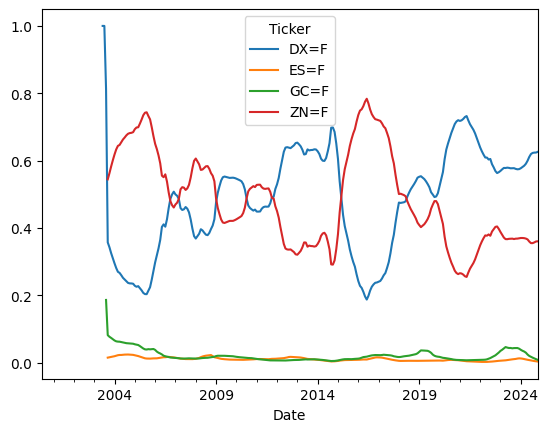

In [41]:
risk_parity_weights.plot()
plt.show()

### 7. Calculate Weighted Returns

Once we have determined the risk-parity weights, the next step is to calculate the weighted returns for each asset and then aggregate them to obtain the portfolio returns. This process allows us to understand how the risk-parity allocation strategy would have performed over time.

#### Steps to Calculate Weighted Returns

1. **Understanding Weighted Returns:**
   - The weighted return of an asset is calculated by multiplying its individual return by the corresponding weight in the portfolio. 
   - The total portfolio return at any given time is the sum of the weighted returns of all assets.

2. **Apply Weights to Returns:**
   - We will multiply the returns of each asset by its corresponding risk-parity weight for each time period. This will give us the weighted return for each asset.
3. **Handle Missing Data:**
   - We drop any rows with missing values (`NaN`) that may result from the multiplication process. This ensures that we only consider time periods with complete data.
4. **Aggregate Weighted Returns:**
   - To calculate the portfolio's return at each time period, sum the weighted returns across all assets. This gives the overall return of the portfolio for each time period.

#### Mathematical Representation:

Given the returns $ r_{i,t} $ for asset $ i $ at time $ t $, and the risk-parity weight $ w_{i,t} $ for asset $ i $ at time $ t $, the weighted return for asset $ i $ at time $ t $ is:

$ r_{i,t}^{weighted} = r_{i,t} \times w_{i,t} $

The total portfolio return at time $ t $ is the sum of the weighted returns for all assets:

$
R_{portfolio,t} = \sum_{i=1}^{n} r_{i,t}^{weighted}
$

Where $ n $ is the number of assets in the portfolio.

By following these steps, we obtain the portfolio returns that reflect the performance of the risk-parity strategy over time. This provides insights into how well the strategy balanced risk across different market conditions.


In [42]:
# Calculate weighted returns
weighted_returns = returns * risk_parity_weights
risk_parity_portfolio_returns = weighted_returns.sum(axis=1)

In [43]:
print(risk_parity_portfolio_returns)

Date
2000-06-30    0.000000
2000-07-31    0.000000
2000-08-31    0.000000
2000-09-30    0.000000
2000-10-31    0.000000
                ...   
2024-07-31   -0.000770
2024-08-31   -0.004916
2024-09-30   -0.002884
2024-10-31    0.006782
2024-11-30    0.006024
Freq: M, Length: 294, dtype: float64


### 8. Evaluate Portfolio Performance

To assess the performance of the risk-parity portfolio, we will compute several key financial metrics. These metrics will help us understand the portfolio's return, risk, and overall performance characteristics. Below are the details of the metrics we will calculate, along with the functions used and their corresponding arguments.

1. **Annualized Mean Return**
   - **Description:** The average return of the portfolio on an annual basis. This is useful for understanding the long-term growth rate of the portfolio.
2. **Annualized Volatility**
   - **Description:** A measure of the portfolio's return volatility on an annual basis, indicating the degree of variation in returns.
   - **Formula:** 
     $
     \text{Annualized Volatility} = \text{Standard Deviation of Monthly Returns} \times \sqrt{12}
     $
3. **Skewness**
   - **Description:** Skewness measures the asymmetry of the return distribution. Positive skewness indicates a distribution with a longer right tail, while negative skewness indicates a longer left tail.
4. **Kurtosis**
   - **Description:** Kurtosis measures the "tailedness" of the return distribution. High kurtosis indicates a distribution with heavy tails and a sharp peak.
5. **Maximum Drawdown**
   - **Description:** The maximum observed loss from a peak to a trough of the portfolio's cumulative returns, before a new peak is attained.
   - **Formula:** 
     $
     \text{Drawdown} = \frac{\text{Cumulative Return} - \text{Running Maximum}}{\text{Running Maximum}}
     $
6. **Sharpe Ratio**
   - **Description:** The Sharpe Ratio measures the risk-adjusted return of the portfolio, calculated as the ratio of the portfolio's excess return (over the risk-free rate, typically assumed to be 0 in this case) to its volatility.
   - **Formula:** 
     $
     \text{Sharpe Ratio} = \frac{\text{Annualized Mean Return}}{\text{Annualized Volatility}}
     $
7. **Sortino Ratio**
   - **Description:** The Sortino Ratio is a variation of the Sharpe Ratio that penalizes only downside volatility, thus providing a better measure of risk-adjusted return for portfolios that have asymmetric return distributions.
   - **Formula:** 
     $
     \text{Sortino Ratio} = \frac{\text{Annualized Mean Return}}{\text{Downside Volatility}}
     $
8. **Calmar Ratio**
   - **Description:** The Calmar Ratio measures the risk-adjusted return of a portfolio by comparing the annualized return to the maximum drawdown, providing insight into performance relative to the worst-case scenario.
   - **Formula:** 
     $
     \text{Calmar Ratio} = \frac{\text{Annualized Mean Return}}{-\text{Maximum Drawdown}}
     $

After calculating these metrics, we will display the results to evaluate the performance of the risk-parity portfolio comprehensively.


In [49]:
risk_parity_results = evaluate_portfolio_performance(risk_parity_portfolio_returns)

print_results(risk_parity_results)

Total Return (%): 27.39
Annual Mean Return (%): 1.04
Annual Volatility (%): 3.25
Downside Volatility (%): 2.02
Skewness: 0.44
Kurtosis: 1.72
Max Drawdown (%): 8.39
Sharpe Ratio: 0.32
Sortino Ratio: 0.51
Calmar Ratio: -0.12


### 9. Plot Results

Visualizing the performance of the risk-parity portfolio is crucial for understanding the dynamics of cumulative returns and drawdowns over time. We will create a plot that displays both the cumulative returns and the drawdowns on the same graph. This will allow us to see how the portfolio grows over time and the extent of losses from peak to trough.

#### Steps to Plot the Results:

1. **Initialize the Plot**:
   - We use `plt.subplots()` to create a figure and an axis object, allowing us to customize the plot.
   - The `figsize` argument specifies the size of the plot. In this case, we choose a wide format (`14x7`) to better display the time series data.
   - Example:
     ```python
     fig, ax = plt.subplots(figsize=(14, 7))
     ```

2. **Plot Cumulative Returns**:
   - The `plot()` function is used to plot the cumulative returns on the axis `ax`.
   - The `label` argument is used to create a legend entry, and `color` specifies the color of the line.
   - Example:
     ```python
     cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue')
     ```

3. **Plot Drawdown**:
   - Similarly, the `plot()` function is used to plot the drawdown on the same axis `ax`.
   - The `label` and `color` arguments distinguish this line from the cumulative returns.
   - Example:
     ```python
     drawdown.plot(ax=ax, label='Drawdown', color='red')
     ```

4. **Customize the Plot**:
   - The `set_title()` function sets the title of the plot, making it clear what the graph represents.
   - The `set_ylabel()` and `set_xlabel()` functions label the y-axis and x-axis, respectively, to indicate what the axes represent (e.g., 'Cumulative Returns' and 'Date').
   - Example:
     ```python
     ax.set_title('Cumulative Returns and Drawdown')
     ax.set_ylabel('Cumulative Returns')
     ax.set_xlabel('Date')
     ```

5. **Add a Legend**:
   - The `legend()` function adds a legend to the plot, helping to identify which line represents cumulative returns and which represents drawdown.
   - Example:
     ```python
     ax.legend()
     ```

6. **Display the Plot**:
   - Finally, `plt.show()` is called to display the plot.
   - Example:
     ```python
     plt.show()
     ```

The resulting plot will provide a clear visual representation of how the portfolio's value has evolved over time and the magnitude of any losses (drawdowns) experienced during the period. This visualization is essential for analyzing the risk and return profile of the portfolio.


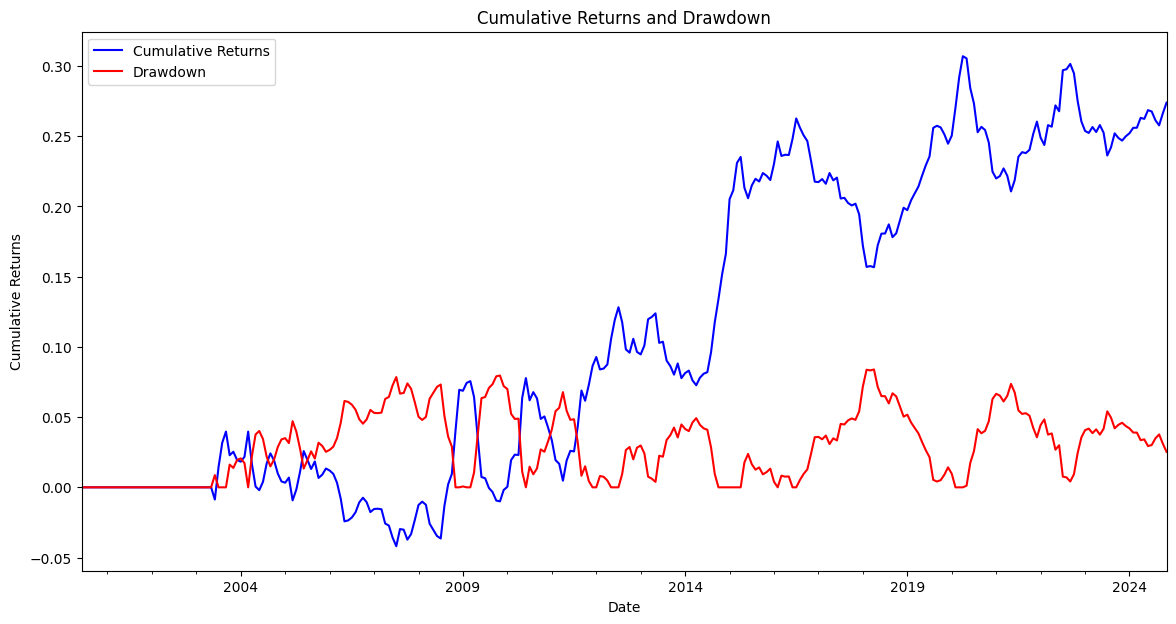

In [52]:
plot_portfolio_performance(risk_parity_results)

# Evaluation of results

The plot above shows both the cumulative returns and the drawdawn from the risk weighted portfolio consisting of front-month futures data for S&P500, 10-year Treasuries, gold, and US dollar.

It can be seen from the plot and from the plot that the total return over the 20 year period is 27.4%. with a maximum drawdown of 8.39%. Which works out at an annualized return of 1.04% and with an annualized downside volitility of 2.51%

# Comparison with iShares MSCI World (acc) EFT

The iShares MSCI World (acc is an ETF traded on most major stock exchanges.

In [55]:
msci_world_data = yf.download('IWDA.AS')
print(msci_world_data.tail())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2024-11-13  102.849998  103.485001  102.485001  103.485001  103.485001  147185
2024-11-14  103.525002  104.160004  103.250000  103.425003  103.425003  158023
2024-11-15  102.610001  102.730003  102.070000  102.139999  102.139999  242774
2024-11-18  102.114998  102.404999  101.739998  102.404999  102.404999  144713
2024-11-19  102.425003  102.440002  101.110001  102.279999  102.279999  154772


In [56]:
# Resample data to monthly frequency
msci_world_data = msci_world_data.resample('M').mean() # YOUR CODE HERE
# Convert index to datetime
msci_world_data.index = pd.to_datetime(msci_world_data.index) # YOUR CODE HERE

In [57]:
# Subset adjusted close prices and fill NaNs
msci_world_prices = msci_world_data['Adj Close'].ffill()
msci_world_returns = msci_world_prices.pct_change().dropna()
print(msci_world_returns)

Date
2009-10-31   -0.000214
2009-11-30    0.001700
2009-12-31    0.037038
2010-01-31    0.032787
2010-02-28   -0.006228
                ...   
2024-07-31    0.013467
2024-08-31   -0.023121
2024-09-30    0.019907
2024-10-31    0.042254
2024-11-30    0.027497
Freq: M, Name: Adj Close, Length: 182, dtype: float64


In [58]:
world_etf_results = evaluate_portfolio_performance(msci_world_returns)

print_results(world_etf_results)

Total Return (%): 497.23
Annual Mean Return (%): 12.53
Annual Volatility (%): 11.53
Downside Volatility (%): 11.47
Skewness: -2.01
Kurtosis: 10.42
Max Drawdown (%): 21.03
Sharpe Ratio: 1.09
Sortino Ratio: 1.09
Calmar Ratio: -0.60


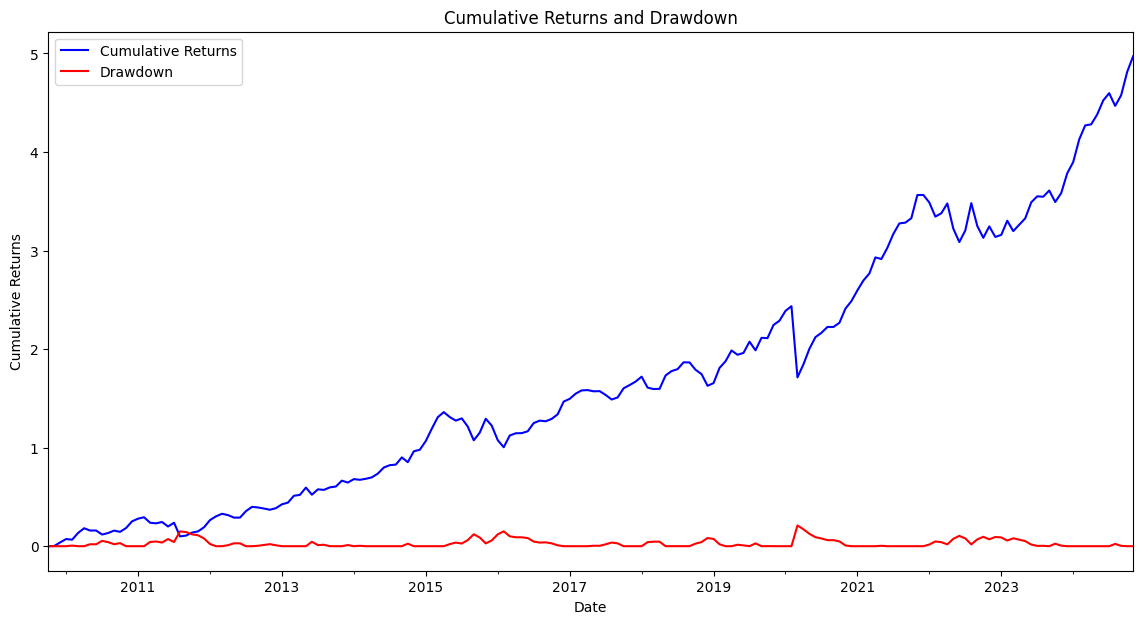

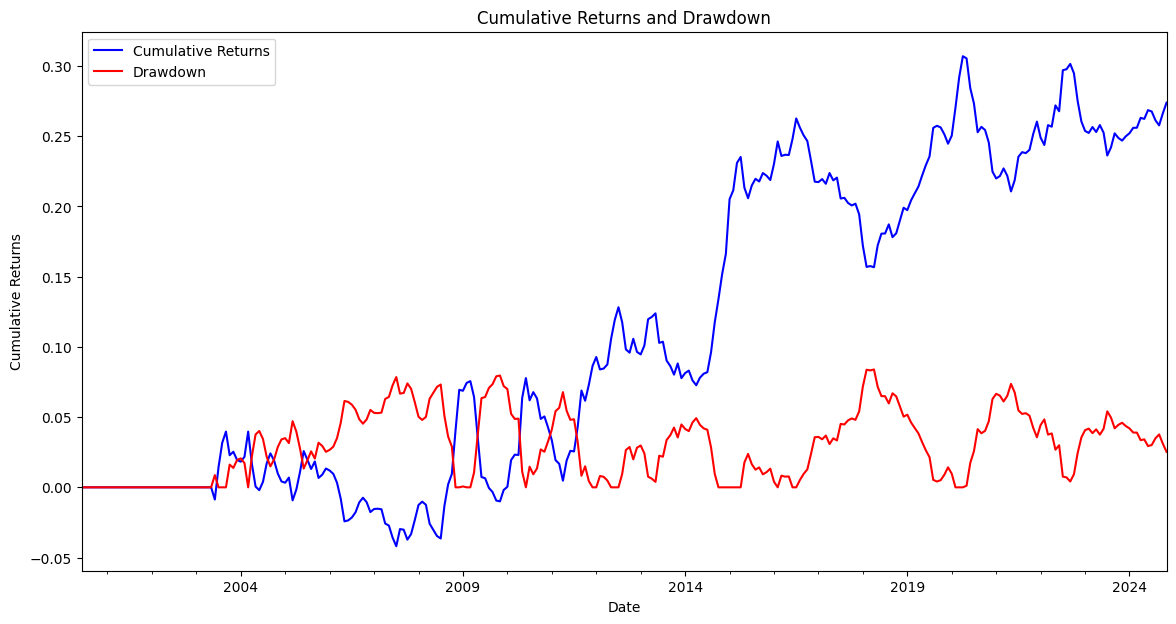

In [69]:
plot_portfolio_performance(world_etf_results)
plot_portfolio_performance(risk_parity_results)

In [63]:
risk_parity_metrics = risk_parity_results['metrics'].values()
world_etf_metrics = world_etf_results['metrics'].values()
columns = world_etf_results['metrics'].keys()

result_table = pd.DataFrame([risk_parity_metrics, world_etf_metrics],
                            columns=columns,
                            index=['Risk Parity', 'World ETF']).T
result_table

,Risk Parity,World ETF
Total Return (%),27.393726,497.233672
Annual Mean Return (%),1.041078,12.529212
Annual Volatility (%),3.250143,11.527761
Downside Volatility (%),2.022120,11.473358
Skewness,0.440031,-2.013024
Kurtosis,1.720113,10.420669
Max Drawdown (%),8.392220,21.033091
Sharpe Ratio,0.320318,1.086873
Sortino Ratio,0.514845,1.092027
Calmar Ratio,-0.124053,-0.595690


## Analysis: Comparing the Risk Parity Portfolio and the World ETF
The table presents a comparison of key performance metrics between a Risk Parity Portfolio and the iShares Core MSCI World UCITS ETF (World ETF). The analysis highlights significant differences in their total returns, risk-adjusted returns, and volatility profiles.

### 1. Total Return and Annual Mean Return
<ul>
<li><b>World ETF</b>: The ETF demonstrates exceptional performance, with a total return of 497.23% and an annual mean return of 12.53%. These figures are far superior to the Risk Parity Portfolio, showcasing the ETF's ability to generate substantial long-term gains.
<li><b>Risk Parity Portfolio</b>: In contrast, the portfolio's total return is only 27.39%, with an annual mean return of 1.04%, suggesting it significantly underperformed relative to the ETF.</li>
</ul>

### 2. Risk Metrics
<ul>
<li><b>Annual Volatility:</b> The World ETF has higher volatility (11.53%) compared to the Risk Parity Portfolio (3.25%). While the ETF offers higher returns, it comes with greater risk, as indicated by its more pronounced price fluctuations.</li>
<li><b>Downside Volatility:</b> Similar trends are observed in downside volatility, where the ETF records 11.47%, compared to 2.02% for the portfolio. This highlights the ETF's susceptibility to larger negative movements, which investors must weigh against its higher returns.</li>
</ul>

### 3. Risk-Adjusted Performance
<ul>
 
<li><b>Sharpe Ratio:</b> The ETF achieves a Sharpe Ratio of 1.09, indicating strong risk-adjusted returns. The Risk Parity Portfolio's Sharpe Ratio is much lower, at 0.32, suggesting it delivers less reward per unit of risk.</li>
<li><b>Sortino Ratio:</b> A similar trend is seen with the Sortino Ratio, where the ETF outperforms significantly (1.09 vs. 0.51). This suggests that even when focusing solely on downside risk, the ETF provides better returns.</li>
<li><b>Calmar Ratio:</b> Interestingly, the Risk Parity Portfolio has a less negative Calmar Ratio (-0.12) compared to the ETF (-0.59). While both ratios are negative due to drawdowns, the portfolio's lower annual mean return reduces its sensitivity to drawdowns.</li>
</ul>

### 4. Skewness and Kurtosis
<ul>
<li><b>Skewness:</b> The Risk Parity Portfolio has a positive skew (0.44), indicating more frequent small gains and fewer large losses. Conversely, the ETF has a negative skew (-2.01), implying a higher likelihood of extreme losses.</li>
<li><b>Kurtosis:</b> The ETF exhibits extremely high kurtosis (10.42) compared to the portfolio (1.72). This suggests that the ETF's returns distribution has fat tails, with more extreme outliers in both directions.</li>
</ul>

### 5. Maximum Drawdown
<ul>
<li><b>World ETF:</b> Despite its higher returns, the ETF experiences a significant maximum drawdown of 21.03%, reflecting its vulnerability to market downturns.</li>
    <li><b>Risk Parity Portfolio:</b> The portfolio's drawdown is much lower at 8.39%, making it a more stable investment option during turbulent periods.</li>
</ul>

### Key Insights
<ul>
    <li>The <b>World ETF</b> is a high-risk, high-reward investment. Its impressive returns and strong risk-adjusted metrics make it a compelling choice for growth-oriented investors who can tolerate volatility and drawdowns.</li>
    <li><b>The Risk Parity Portfolio</b>, on the other hand, is better suited for risk-averse investors. While its returns are modest, it offers a smoother performance with lower volatility and smaller drawdowns.</li>
</ul>


### Conclusion
For investors seeking long-term capital appreciation and willing to accept higher risk, the World ETF is the clear choice. However, for those prioritizing capital preservation and reduced volatility, the Risk Parity Portfolio provides a more stable alternative. The decision ultimately depends on an investor's risk tolerance, financial goals, and investment horizon.